# Diabetes Risk Prediction with EDA

***Bartlomiej Lesniowski***

***11.12.2024***

# Introduction

### Description from Kaggle.com

The dataset used for diabetes prediction in this project serves as a comprehensive tool for understanding and managing diabetes risk factors. This dataset was synthetically generated to resemble real-world health information, covering data from 2021 to 2023. It incorporates various health metrics essential for diabetes risk assessment and prediction, making it ideal for training machine learning models like XGBoost.

The dataset is structured to include user demographic data, health metrics, and lifestyle-related features, all of which are critical in identifying diabetes risk levels. It aims to provide a realistic value distribution that aids in the prediction and personalized health recommendation process.

# Preaparation of the dataset

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Data dictionary

In [2]:
description = pd.read_excel('Diabetes Description.xlsx')
description

,Column_Name,Column_Description
0,User ID,Unique identifier assigned to each user to ensure data privacy and tracking.
1,Data,"Represents the specific date for each record, indicating the time-series nature of the dataset."
2,Weight (kg),The user's body weight in kilograms. Weight is a significant factor in determining obesity-related risks.
3,Height (cm),"Height of the user, measured in centimeters. This, combined with weight, helps calculate BMI, a key predictor of diabetes risk."
4,Blood Glucose (mg/dL),"The user's blood glucose level in milligrams per deciliter. This is one of the most crucial indicators for diagnosing diabetes, with values typically ranging between 70 and 300 mg/dL."
5,Physical Activity (minutes/day),"The daily duration of physical activity, measured in minutes. Physical activity plays a critical role in managing blood glucose levels and reducing diabetes risk."
6,Diet Quality,"A categorical variable describing the quality of the user's diet, labeled as either 'healthy' or 'unhealthy'. Diet plays an important role in diabetes prevention and management."
7,Medication Adherence,"Indicates the extent of the user's adherence to prescribed medication, categorized as 'good' or 'poor'. Proper adherence is crucial for managing blood glucose levels effectively."
8,Stress Level,"The stress level reported by the user, categorized as 'low', 'medium', or 'high'. Chronic stress can significantly impact blood glucose levels and contribute to diabetes risk."
9,Sleep Duration (hours),The number of hours the user sleeps each day. Adequate sleep is vital for maintaining overall health and stabilizing blood sugar levels.


### Download data from kagglehub

In [3]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("kevintan701/diabetes-prediction-datasets")

#print("Path to dataset files:", path)

In [4]:
diabetes = pd.read_csv('diabetes_data.csv')

In [5]:
diabetes.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.45,183.99,112.99,0.00,1,0,1,6.34,1,22.90,38.00
1,2,2021-01-02,67.93,179.25,134.22,12.79,0,1,2,10.66,1,21.10,39.16
2,3,2021-01-03,79.72,170.60,108.30,21.73,1,1,0,6.00,1,27.40,31.48
3,4,2021-01-04,92.85,163.53,127.68,67.75,1,0,1,7.96,1,34.70,45.00
4,5,2021-01-05,66.49,176.98,70.00,41.13,1,1,0,6.77,1,21.20,4.72


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


### Clearing the data

In [7]:
for c in diabetes.columns:
    print('---' + c + '---')
    print(diabetes[c].value_counts().head())

---user_id---
user_id
1      1
672    1
659    1
660    1
661    1
Name: count, dtype: int64
---date---
date
2021-01-01    1
2023-01-05    1
2022-12-22    1
2022-12-23    1
2022-12-24    1
Name: count, dtype: int64
---weight---
weight
40.00    17
77.45     1
64.43     1
67.83     1
61.40     1
Name: count, dtype: int64
---height---
height
150.00    18
200.00     2
166.08     1
159.93     1
181.40     1
Name: count, dtype: int64
---blood_glucose---
blood_glucose
70.00     37
112.99     1
165.03     1
96.32      1
175.61     1
Name: count, dtype: int64
---physical_activity---
physical_activity
0.00     76
33.21     1
22.80     1
15.44     1
37.47     1
Name: count, dtype: int64
---diet---
diet
1    604
0    396
Name: count, dtype: int64
---medication_adherence---
medication_adherence
1    693
0    307
Name: count, dtype: int64
---stress_level---
stress_level
0    373
2    323
1    304
Name: count, dtype: int64
---sleep_hours---
sleep_hours
4.00     66
12.00     9
6.34      1
6.92      1


As there are only unique values in columns 'user_id' and 'date', I will drop them

In [8]:
diabetes = diabetes.drop(['user_id', 'date'], axis = 1)

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight                1000 non-null   float64
 1   height                1000 non-null   float64
 2   blood_glucose         1000 non-null   float64
 3   physical_activity     1000 non-null   float64
 4   diet                  1000 non-null   int64  
 5   medication_adherence  1000 non-null   int64  
 6   stress_level          1000 non-null   int64  
 7   sleep_hours           1000 non-null   float64
 8   hydration_level       1000 non-null   int64  
 9   bmi                   1000 non-null   float64
 10  risk_score            1000 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 86.1 KB


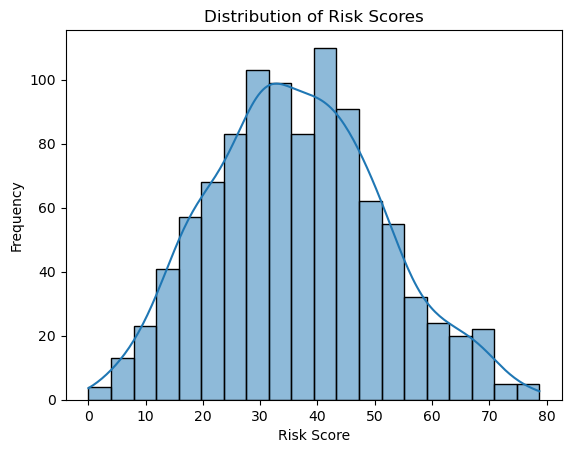

In [10]:
sns.histplot(diabetes['risk_score'], kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

## Feature engineering

For better understanding of the dataset, I will convert the target feature 'risk-score' to 3 categories mentioned in dictionary:

- Low Risk (< 30): Users are considered to have a low likelihood of developing diabetes.

- Moderate Risk (30-60): Users are given preventive advice to lower their risk.

- High Risk (> 60): Users are at high risk and receive urgent recommendations to manage their condition.

In [11]:
r1 = diabetes['risk_score'] >60
r2 = diabetes['risk_score'].between(30, 60)
r3 = diabetes['risk_score'] < 30

In [12]:
diabetes['risk'] = np.select([r1,r2,r3],('High','Moderate','Low'),default=None)
diabetes['risk'].value_counts()

risk
Moderate    587
Low         341
High         72
Name: count, dtype: int64

In [13]:
diabetes.head()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score,risk
0,77.45,183.99,112.99,0.00,1,0,1,6.34,1,22.90,38.00,Moderate
1,67.93,179.25,134.22,12.79,0,1,2,10.66,1,21.10,39.16,Moderate
2,79.72,170.60,108.30,21.73,1,1,0,6.00,1,27.40,31.48,Moderate
3,92.85,163.53,127.68,67.75,1,0,1,7.96,1,34.70,45.00,Moderate
4,66.49,176.98,70.00,41.13,1,1,0,6.77,1,21.20,4.72,Low


In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight                1000 non-null   float64
 1   height                1000 non-null   float64
 2   blood_glucose         1000 non-null   float64
 3   physical_activity     1000 non-null   float64
 4   diet                  1000 non-null   int64  
 5   medication_adherence  1000 non-null   int64  
 6   stress_level          1000 non-null   int64  
 7   sleep_hours           1000 non-null   float64
 8   hydration_level       1000 non-null   int64  
 9   bmi                   1000 non-null   float64
 10  risk_score            1000 non-null   float64
 11  risk                  1000 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 93.9+ KB


There are 1000 rows, 12 columns and no nulls

# Exploratory Data Analysis

Defining functions

In [15]:
def plot_var(col_name, full_name):

        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,3), dpi=90)
    

        sns.boxplot(x=col_name, y='risk', data=diabetes, ax=ax1)
        ax1.set_ylabel('')
        ax1.set_title(full_name + ' by risk')
        
        sns.histplot(diabetes.loc[diabetes[col_name].notnull(), col_name], kde=True)

### weight

In [16]:
description.Column_Description[2]

" The user's body weight in kilograms. Weight is a significant factor in determining obesity-related risks."

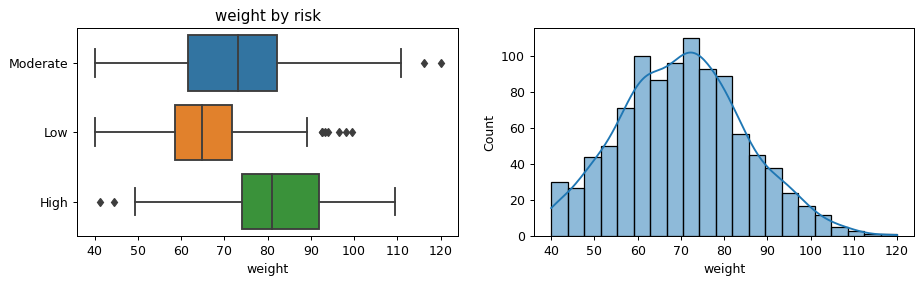

In [17]:
plot_var('weight','weight')

In [18]:
diabetes.groupby('risk')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,80.93,15.33,41.22,73.98,81.02,91.89,109.49
Low,341.00,65.11,11.20,40.00,58.67,64.86,71.83,99.47
Moderate,587.00,72.11,14.92,40.00,61.70,73.21,82.19,120.00


People with higher weight have higher probability of diabetes

### height

In [19]:
description.Column_Description[3]

' Height of the user, measured in centimeters. This, combined with weight, helps calculate BMI, a key predictor of diabetes risk.'

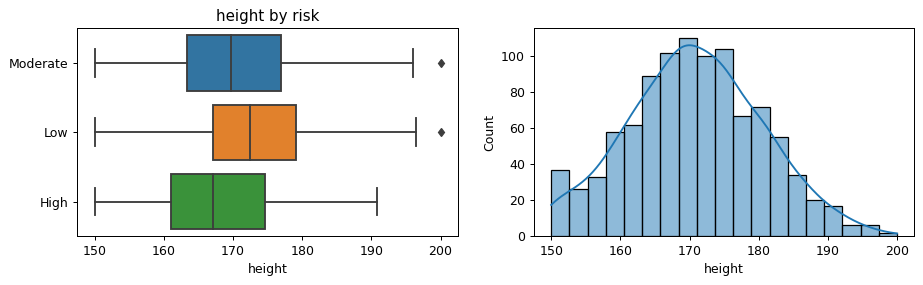

In [20]:
plot_var('height','height')

In [21]:
diabetes.groupby('risk')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,167.24,9.98,150.00,161.07,167.05,174.67,190.77
Low,341.00,172.57,9.48,150.00,167.05,172.39,179.14,200.00
Moderate,587.00,170.20,9.69,150.00,163.34,169.77,176.95,200.00


People with higher probability of diabetes are slightly lower than people with lowest probability

### blood_glucose

In [22]:
description.Column_Description[4]

" The user's blood glucose level in milligrams per deciliter. This is one of the most crucial indicators for diagnosing diabetes, with values typically ranging between 70 and 300 mg/dL."

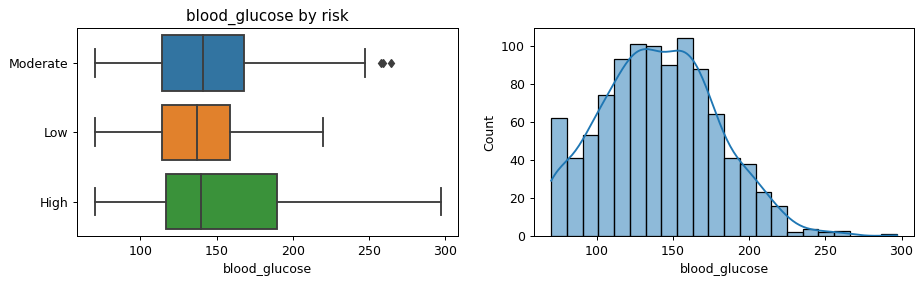

In [23]:
plot_var('blood_glucose','blood_glucose')

In [24]:
diabetes.groupby('risk')['blood_glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,148.48,48.03,70.00,116.75,139.64,189.50,297.05
Low,341.00,136.83,32.63,70.00,114.10,137.43,158.67,219.83
Moderate,587.00,142.20,39.42,70.00,114.17,141.37,167.77,264.40


With rising blood glucose rises diabetes risk

### physical_activity

In [25]:
description.Column_Description[5]

' The daily duration of physical activity, measured in minutes. Physical activity plays a critical role in managing blood glucose levels and reducing diabetes risk.'

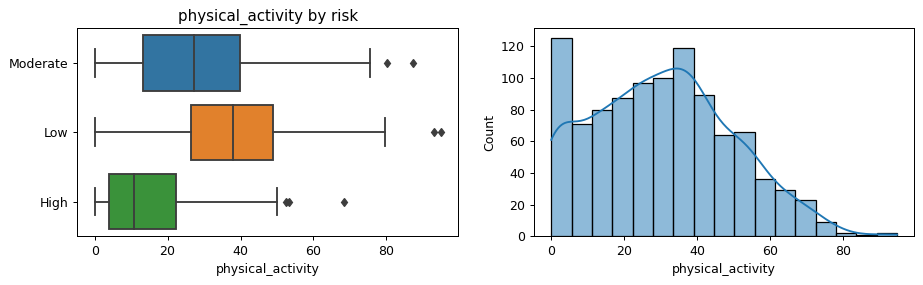

In [26]:
plot_var('physical_activity','physical_activity')

In [27]:
diabetes.groupby('risk')['physical_activity'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,15.36,15.37,0.00,3.94,10.88,22.41,68.41
Low,341.00,37.52,18.27,0.00,26.42,37.92,49.03,94.86
Moderate,587.00,27.93,18.70,0.00,13.34,27.21,39.83,87.37


People with highest diabetes risk has lower physical activity time

### diet

In [28]:
description.Column_Description[6]

" A categorical variable describing the quality of the user's diet, labeled as either 'healthy' or 'unhealthy'. Diet plays an important role in diabetes prevention and management."

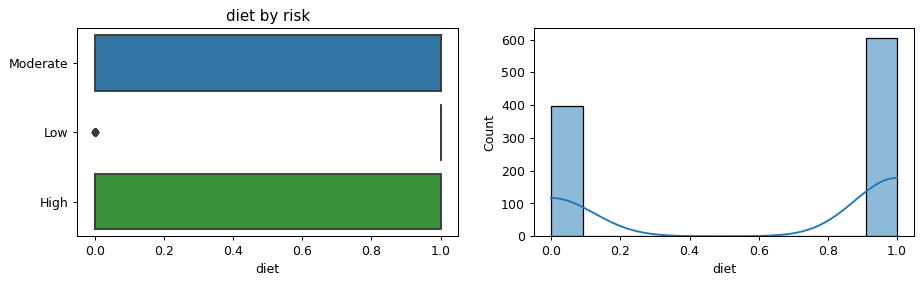

In [29]:
plot_var('diet','diet')

In [30]:
diabetes.groupby('risk')['diet'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,0.29,0.46,0.00,0.00,0.00,1.00,1.00
Low,341.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Moderate,587.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00


People who have healthier diet have lower risk of diabetes

### medication_adherence

In [31]:
description.Column_Description[7]

" Indicates the extent of the user's adherence to prescribed medication, categorized as 'good' or 'poor'. Proper adherence is crucial for managing blood glucose levels effectively."

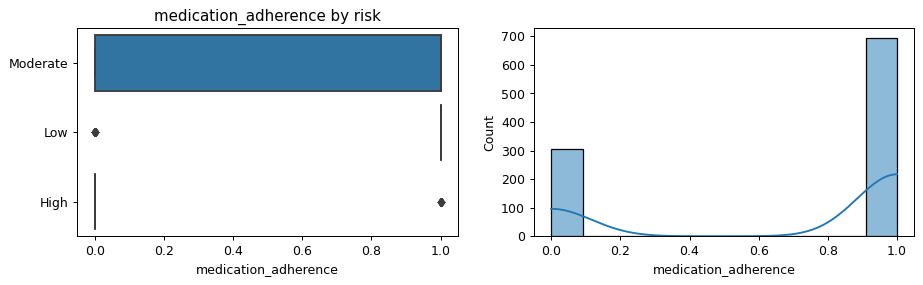

In [32]:
plot_var('medication_adherence','medication_adherence')

In [33]:
diabetes.groupby('risk')['medication_adherence'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
Low,341.00,0.93,0.26,0.00,1.00,1.00,1.00,1.00
Moderate,587.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00


People with higher medication adherence have lower risk of diabeties

### stress_level

In [34]:
description.Column_Description[8]

" The stress level reported by the user, categorized as 'low', 'medium', or 'high'. Chronic stress can significantly impact blood glucose levels and contribute to diabetes risk."

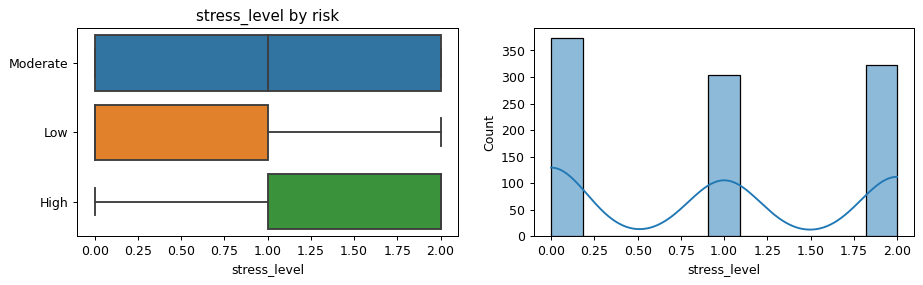

In [35]:
plot_var('stress_level','stress_level')

In [36]:
diabetes.groupby('risk')['stress_level'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,1.43,0.71,0.00,1.00,2.00,2.00,2.00
Low,341.00,0.71,0.79,0.00,0.00,0.00,1.00,2.00
Moderate,587.00,1.03,0.83,0.00,0.00,1.00,2.00,2.00


People with the highest stress level have higher risk of diabetes

### sleep_hours

In [37]:
description.Column_Description[9]

' The number of hours the user sleeps each day. Adequate sleep is vital for maintaining overall health and stabilizing blood sugar levels.'

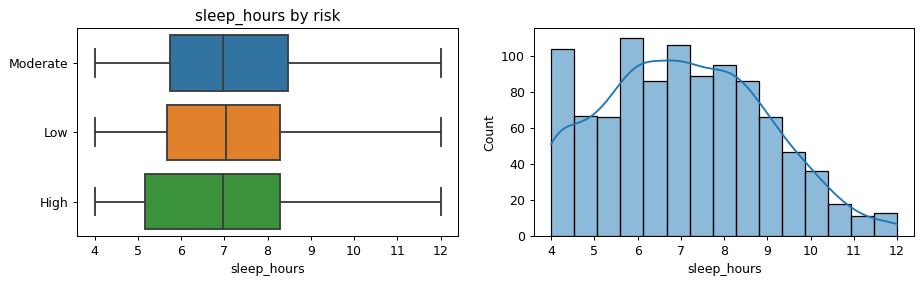

In [38]:
plot_var('sleep_hours','sleep_hours')

In [39]:
diabetes.groupby('risk')['sleep_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,6.86,1.94,4.00,5.16,6.96,8.28,12.00
Low,341.00,7.06,1.82,4.00,5.68,7.04,8.28,12.00
Moderate,587.00,7.11,1.91,4.00,5.74,6.97,8.47,12.00


All three risk categories have similar sleep hours mean, however High risk has the lowest one, additionaly we can read from boxplot that body starts from lower values that Low and Moderate.

### hydration_level

In [40]:
description.Column_Description[10]

" Indicates whether the user is adequately hydrated, with values of 'yes' or 'no'. Proper hydration supports optimal body function, which includes maintaining blood glucose balance."

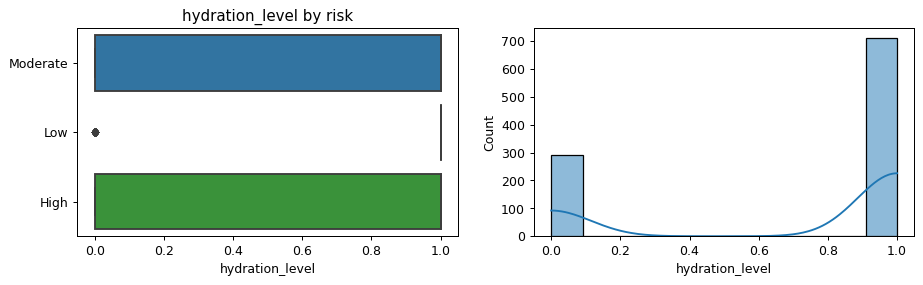

In [41]:
plot_var('hydration_level','hydration_level')

In [42]:
diabetes.groupby('risk')['hydration_level'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,0.61,0.49,0.00,0.00,1.00,1.00,1.00
Low,341.00,0.79,0.41,0.00,1.00,1.00,1.00,1.00
Moderate,587.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00


People with the lowest hydration level have higher risk od diabetes

### bmi

In [43]:
description.Column_Description[11]

' Body Mass Index, calculated using the weight and height of the user. BMI is an important indicator of whether an individual is underweight, of normal weight, overweight, or obese, which is directly linked to diabetes risk.'

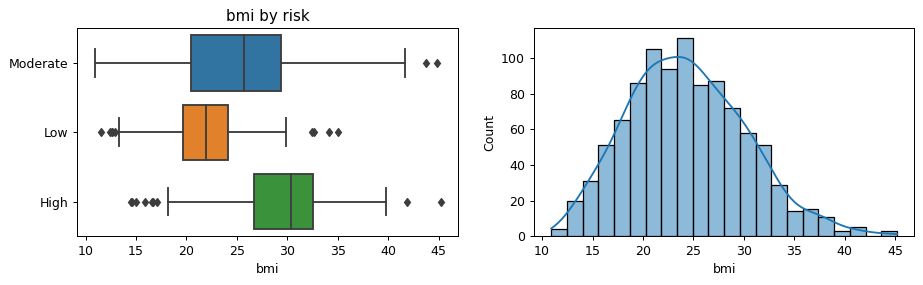

In [44]:
plot_var('bmi','bmi')

In [45]:
diabetes.groupby('risk')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
High,72.00,29.28,6.42,14.50,26.68,30.40,32.60,45.20
Low,341.00,21.94,3.78,11.50,19.70,21.90,24.10,35.00
Moderate,587.00,25.21,6.20,10.90,20.50,25.70,29.40,44.80


People with higher BMI have higher diabetes risk

In [46]:
diabetes = diabetes.drop(['risk'], axis = 1)

## Model training

I will check reggresion models from lazypredict library

In [47]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [48]:
X = diabetes.drop(['risk_score'], axis=1)
y = diabetes['risk_score']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2137)

In [50]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 18.83it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [00:01<00:00, 21.08it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 36.795153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [51]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.98,0.98,2.15,0.23
HistGradientBoostingRegressor,0.97,0.98,2.26,0.35
LGBMRegressor,0.97,0.97,2.37,0.12
XGBRegressor,0.95,0.95,3.28,0.22
RandomForestRegressor,0.88,0.89,4.81,0.49
ExtraTreesRegressor,0.87,0.88,4.98,0.24
BaggingRegressor,0.86,0.87,5.21,0.06
MLPRegressor,0.81,0.82,6.13,0.37
DecisionTreeRegressor,0.80,0.81,6.21,0.01
